In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import yfinance as yf
import random
import numpy as np

In [2]:
#Reading Congress csv
transactions_df = pd.read_csv("Congress Transactions 2021-2022.csv")
transactions_df

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,state,ptr_link,cap_gains_over_200_usd,industry,sector,party
0,2022,1/8/2022,12/31/2021,self,IS,ironSource Ltd Class A Ordinary Shares,purchase,"$1,001 - $15,000",Deborah K. Ross,NC02,NC,https://disclosures-clerk.house.gov/public_dis...,False,NaN,NaN,Democrat
1,2022,1/5/2022,12/31/2021,NaN,Z,Zillow Group Inc - Class C Capital Stock,sale_full,"$50,001 - $100,000",James R. Langevin,RI02,RI,https://disclosures-clerk.house.gov/public_dis...,False,Business Services,Consumer Discretionary,Democrat
2,2022,5/27/2022,12/31/2021,NaN,ETH-USD,Ethereum Crypto Currency,purchase,"$100,001 - $250,000",David Madison Cawthorn,NC11,NC,https://disclosures-clerk.house.gov/public_dis...,False,NaN,NaN,Republican
3,2022,2/8/2022,12/31/2021,self,AAPl,Apple Inc,sale_full,"$15,001 - $50,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,False,Computer Manufacturing,Technology,Democrat
4,2022,2/11/2022,12/31/2021,joint,INFO,IHS Markit Ltd Common Shares,sale_full,"$15,001 - $50,000",Kathy Manning,NC06,NC,https://disclosures-clerk.house.gov/public_dis...,False,"Computer Software: Programming, Data Processing",Technology,Democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,2021,2/13/2021,1/4/2021,self,CHWY,"Chewy, Inc. Class A",purchase,"$1,001 - $15,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,False,NaN,NaN,Democrat
4779,2021,2/13/2021,1/4/2021,self,FDX,FedEx Corporation,sale_full,"$1,001 - $15,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,True,Air Freight/Delivery Services,Transportation,Democrat
4780,2021,2/13/2021,1/4/2021,self,ZOOM,"Zoom Technologies, Inc.",purchase,"$1,001 - $15,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,False,NaN,NaN,Democrat
4781,2021,2/13/2021,1/4/2021,self,ZM,"Zoom Video Communications, Inc. - Class A",sale_full,"$15,001 - $50,000",Marie Newman,IL03,IL,https://disclosures-clerk.house.gov/public_dis...,False,"Computer Software: Programming, Data Processing",Technology,Democrat


In [3]:
#Create a list of congress people on the csv
representatives_list = transactions_df.representative.values.tolist()
#remove duplicates from the list
reps_no_dups = [*set(representatives_list)]
#choose number of random reps from the list - here we are choosing 6  
random_reps = random.sample(reps_no_dups, 1)
random_reps



['Dean Phillips']

In [4]:
#get tickers from all transactions for each of the random congress people chosen above
rand_reps_transactions = transactions_df[transactions_df['representative'].isin(random_reps)]
#set type of transaction to purchase only
rand_reps_purchases = rand_reps_transactions[rand_reps_transactions["type"]=="purchase"]
rand_reps_purchases


,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,state,ptr_link,cap_gains_over_200_usd,industry,sector,party
4626,2021,2/13/2021,1/12/2021,NaN,FMS,Fresenius Media Care AG,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Medical/Nursing Services,Health Care,Democrat
4655,2021,2/13/2021,1/11/2021,NaN,FMS,Fresenius Media Care AG,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Medical/Nursing Services,Health Care,Democrat
4690,2021,2/13/2021,1/8/2021,NaN,ACGL,Arch Capital Group Ltd,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Property-Casualty Insurers,Finance,Democrat
4720,2022,8/13/2022,1/5/2021,NaN,ABT,Abbot Laboratories,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Major Pharmaceuticals,Health Care,Democrat
4725,2021,2/13/2021,1/5/2021,NaN,ABT,Abbot Laboratoreis,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Major Pharmaceuticals,Health Care,Democrat
4726,2021,2/13/2021,1/5/2021,NaN,ABT,Abbot Laboratoreis,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Major Pharmaceuticals,Health Care,Democrat
4727,2021,2/13/2021,1/5/2021,NaN,ALXN,Alexion Pharma Inc,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Major Pharmaceuticals,Health Care,Democrat
4731,2021,2/13/2021,1/5/2021,NaN,ES,Eversource Energy,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Electric Utilities: Central,Public Utilities,Democrat
4732,2021,2/13/2021,1/5/2021,NaN,IRM,Iron Mountain Incorporated,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Real Estate Investment Trusts,Consumer Services,Democrat
4733,2021,2/13/2021,1/5/2021,NaN,TSLA,Tesla Inc,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Auto Manufacturing,Capital Goods,Democrat


In [5]:
#get the tickers for all transactions in the dataframe of transactions for randomly chosen congress people
tickers = rand_reps_purchases.ticker.values.tolist()
#remove duplicates from tickers
tickers = [*set(tickers)]
tickers


['ALXN', 'TSLA', 'ES', 'IRM', 'ACGL', 'FMS', 'ABT']

In [10]:
#tickers to yfinance to get history to get history for specified date range
stock_info = yf.download(tickers, start = "2021-1-1", end = "2022-1-1", ignore_tz=True)
stock_info


[*********************100%***********************]  7 of 7 completed

1 Failed download:
- ALXN: No timezone found, symbol may be delisted


Adj Close                                                   \
                   ABT       ACGL ALXN         ES        FMS        IRM   
Date                                                                      
2021-01-04  105.199539  34.900002  NaN  79.739555  40.686523  25.832296   
2021-01-05  106.501152  35.040001  NaN  80.315132  41.250687  26.030590   
2021-01-06  106.279404  36.580002  NaN  84.098755  41.260254  25.967495   
2021-01-07  107.311058  36.240002  NaN  83.551491  40.829956  25.724136   
2021-01-08  107.609947  36.439999  NaN  85.231026  41.422802  25.733149   
...                ...        ...  ...        ...        ...        ...   
2021-12-27  138.498352  43.930000  NaN  86.599693  31.504185  50.041241   
2021-12-28  137.529068  44.270000  NaN  87.415024  31.377312  50.308178   
2021-12-29  138.234009  44.599998  NaN  87.948868  31.738419  50.298641   
2021-12-30  138.047974  44.330002  NaN  88.463303  31.543224  50.088905   
2021-12-31  137.793427  44.450001  NaN  88.308006  31.679859  49.888702   

                             Close                  ...       Open             \
                  TSLA         ABT       ACGL ALXN  ...        FMS        IRM   
Date                                                ...                         
2021-01-04  243.256668  109.110001  34.900002  NaN  ...  42.970001  30.000000   
2021-01-05  245.036667  110.459999  35.040001  NaN  ...  43.169998  28.680000   
2021-01-06  251.993332  110.230003  36.580002  NaN  ...  42.700001  29.139999   
2021-01-07  272.013336  111.300003  36.240002  NaN  ...  42.700001  28.809999   
2021-01-08  293.339996  111.610001  36.439999  NaN  ...  42.820000  28.770000   
...                ...         ...        ...  ...  ...        ...        ...   
2021-12-27  364.646667  141.460007  43.930000  NaN  ...  32.279999  51.250000   
2021-12-28  362.823334  140.470001  44.270000  NaN  ...  32.060001  52.290001   
2021-12-29  362.063324  141.190002  44.599998  NaN  ...  32.529999  53.000000   
2021-12-30  356.779999  141.000000  44.330002  NaN  ...  32.490002  52.860001   
2021-12-31  352.260010  140.740005  44.450001  NaN  ...  32.279999  52.580002   

                         Volume                                          \
                  TSLA      ABT     ACGL ALXN       ES     FMS      IRM   
Date                                                                      
2021-01-04  239.820007  6192000  2167100  NaN  1744300  165100  4853900   
2021-01-05  241.220001  4322800  1814500  NaN  2209200  141800  2099400   
2021-01-06  252.830002  5539600  3357300  NaN  2920400  145600  3368100   
2021-01-07  259.209991  5568800  2516900  NaN  1757600  139500  3231800   
2021-01-08  285.333344  4242200  4449800  NaN  1621400  371300  2443700   
...                ...      ...      ...  ...      ...     ...      ...   
2021-12-27  357.890015  3801700   704900  NaN   819700  270900  2029700   
2021-12-28  369.829987  3296000   684800  NaN   550200  259700   830400   
2021-12-29  366.213318  2848900   518300  NaN   577500  256200   931300   
2021-12-30  353.776672  2809100   530200  NaN   820300  128500  1366900   
2021-12-31  357.813324  3271800   777500  NaN   980200  262100  1216000   

                       
                 TSLA  
Date                   
2021-01-04  145914600  
2021-01-05   96735600  
2021-01-06  134100000  
2021-01-07  154496700  
2021-01-08  225166500  
...               ...  
2021-12-27   71145900  
2021-12-28   60324000  
2021-12-29   56154000  
2021-12-30   47040900  
2021-12-31   40733700  

[252 rows x 42 columns]

In [17]:
#Copy stock history to a static dataframe so we are not requesting data every time we reference 
stock_static = stock_info["Adj Close"].copy()
#Changing date from index to a column
stock_static.reset_index(inplace=True)
stock_static = stock_static.dropna(axis='columns', how='all')
stock_static

#Have to use this format to access columns
#a = stock_static["Adj Close"]["ACN"].values.tolist()
#a

,Date,ABT,ACGL,ES,FMS,IRM,TSLA
0,2021-01-04,105.199539,34.900002,79.739555,40.686523,25.832296,243.256668
1,2021-01-05,106.501152,35.040001,80.315132,41.250687,26.030590,245.036667
2,2021-01-06,106.279404,36.580002,84.098755,41.260254,25.967495,251.993332
3,2021-01-07,107.311058,36.240002,83.551491,40.829956,25.724136,272.013336
4,2021-01-08,107.609947,36.439999,85.231026,41.422802,25.733149,293.339996
...,...,...,...,...,...,...,...
247,2021-12-27,138.498352,43.930000,86.599693,31.504185,50.041241,364.646667
248,2021-12-28,137.529068,44.270000,87.415024,31.377312,50.308178,362.823334
249,2021-12-29,138.234009,44.599998,87.948868,31.738419,50.298641,362.063324
250,2021-12-30,138.047974,44.330002,88.463303,31.543224,50.088905,356.779999


In [18]:
#Convert the date format to match the Congress dataframe date format
#stock_static = pd.to_datetime(stock_static["Date"], format = '%Y-%m-%d %H:%M:%S').strftime('%m/%d/%Y')
stock_static["New Date"]= stock_static["Date"].dt.strftime('%#m/%d/%Y')
#dff = dff["Old Time"].dt.strftime("%d/%m/%Y %H:%M")
stock_static

,Date,ABT,ACGL,ES,FMS,IRM,TSLA,New Date
0,2021-01-04,105.199539,34.900002,79.739555,40.686523,25.832296,243.256668,1/04/2021
1,2021-01-05,106.501152,35.040001,80.315132,41.250687,26.030590,245.036667,1/05/2021
2,2021-01-06,106.279404,36.580002,84.098755,41.260254,25.967495,251.993332,1/06/2021
3,2021-01-07,107.311058,36.240002,83.551491,40.829956,25.724136,272.013336,1/07/2021
4,2021-01-08,107.609947,36.439999,85.231026,41.422802,25.733149,293.339996,1/08/2021
...,...,...,...,...,...,...,...,...
247,2021-12-27,138.498352,43.930000,86.599693,31.504185,50.041241,364.646667,12/27/2021
248,2021-12-28,137.529068,44.270000,87.415024,31.377312,50.308178,362.823334,12/28/2021
249,2021-12-29,138.234009,44.599998,87.948868,31.738419,50.298641,362.063324,12/29/2021
250,2021-12-30,138.047974,44.330002,88.463303,31.543224,50.088905,356.779999,12/30/2021


In [19]:
type(stock_static["New Date"][0])


str

In [20]:
acn_purchases = rand_reps_purchases.loc[rand_reps_purchases['ticker'] == "ABT"]
acn_purchases

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,state,ptr_link,cap_gains_over_200_usd,industry,sector,party
4720,2022,8/13/2022,1/5/2021,NaN,ABT,Abbot Laboratories,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Major Pharmaceuticals,Health Care,Democrat
4725,2021,2/13/2021,1/5/2021,NaN,ABT,Abbot Laboratoreis,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Major Pharmaceuticals,Health Care,Democrat
4726,2021,2/13/2021,1/5/2021,NaN,ABT,Abbot Laboratoreis,purchase,"$1,001 - $15,000",Dean Phillips,MN03,MN,https://disclosures-clerk.house.gov/public_dis...,False,Major Pharmaceuticals,Health Care,Democrat


In [ ]:
#Getting the price data for a specific stock and date
#purchase_price = stock_static[stock_static["New Date"] =="1/04/2021"]["Adj Close"]["NTAP"]
#purchase_price

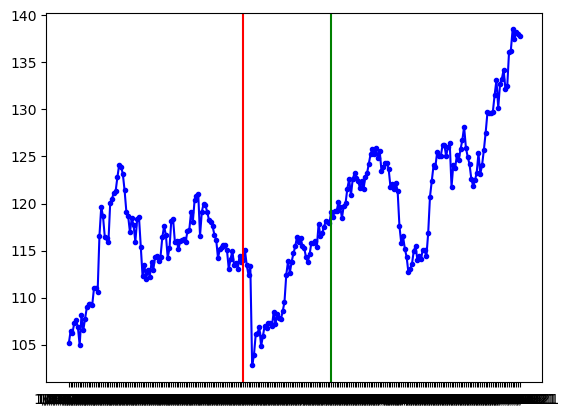

In [21]:
ticker = stock_static["ABT"]
date = stock_static["New Date"]

plt.plot(date, ticker, color='blue', marker='.', linestyle='solid')
plt.axvline("8/03/2021", color = "green")
plt.axvline("5/24/2021", color ="red")


#purchase_price = stock_static[stock_static["New Date"] == "01/04/2021"]["Adj Close"]["AMZN"]


#purchase_date = "01/04/2021"
#purchase_price = stock_static[stock_static["New Date"] == purchase_date]["Adj Close"]["AMZN"]

#plt.plot(purchase_date,purchase_price, marker = "o",color="red")
#transaction = acn_purchases["transaction_date"]


#x = stock_static["Adj Close"]["ABNB"] & date == transaction
#print(x)
#plt.plot(transaction)
#months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
#plt.xticks(np.linspace(0,365,13), months)



#"= df['date'].apply(pd.Timestamp)
#df=df.set_index('date')
#df.plot(marker='o')

plt.show()

